# Data Loading and Initial Setup
Import pandas and other required libraries. Load the survey datasets (d1, d2, d3) into pandas DataFrames.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

d1 = pd.read_csv('d1_for_python.csv')
dc = pd.read_csv('dc_for_python.csv')
d4 = pd.read_csv('d4_for_python.csv')

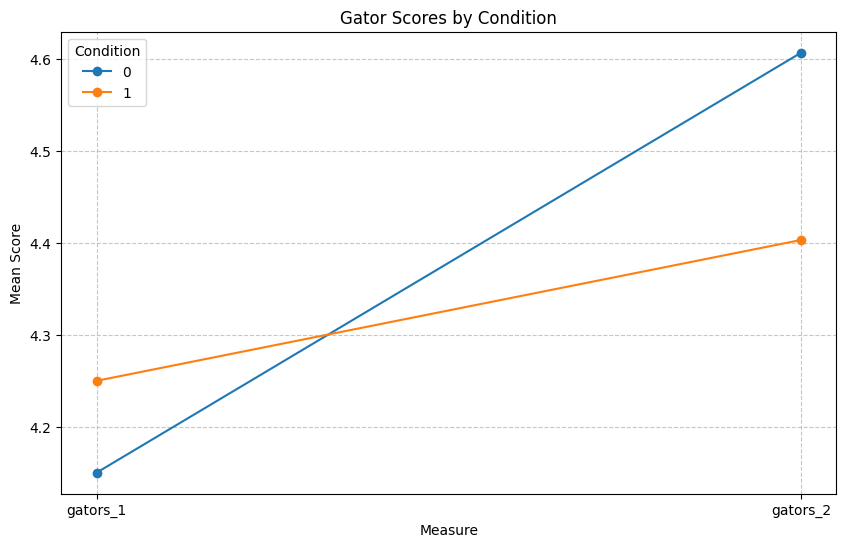

In [20]:
# Calculate and reshape means
means = d1.groupby('condition')[['gators_1', 'gators_2']].mean()
means_t = means.T  # Transpose to get gators as columns

# Create line plot
plt.figure(figsize=(10, 6))

# Plot each condition as a line
for condition in means.index:
    plt.plot(['gators_1', 'gators_2'], 
             means.loc[condition], 
             marker='o',
             label=condition)

plt.title('Gator Scores by Condition')
plt.xlabel('Measure')
plt.ylabel('Mean Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Condition')
plt.show()

In [45]:
# can we check if the interaction is significant?
# we can use a two-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Reshape data for ANOVA
d1_long = d1.melt(id_vars=['condition', 'sub_id'],
                  value_vars=['gators_1', 'gators_2'], 
                  var_name='measure', 
                  value_name='score')

# Fit ANOVA model
# model = ols('score ~ condition * measure', data=d1_long).fit()

In [48]:
d1_long['sub_id'] = d1_long['sub_id'].astype(int)

In [23]:
model = ols('score ~ condition * measure', data=d1_long).fit()

In [27]:
#check the ANOVA table
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
measure,1.305000,1.0,3.180539,0.080140
condition,0.039018,1.0,0.095095,0.758984
condition:measure,0.334190,1.0,0.814487,0.370805
Residual,22.156619,54.0,NaN,NaN


In [31]:
d1_long.groupby(['condition', 'measure']).mean()

score
condition measure           
0         gators_1  4.150000
          gators_2  4.607143
1         gators_1  4.250000
          gators_2  4.403333

In [34]:
d1['condition'].value_counts()

condition
1    15
0    14
Name: count, dtype: int64

In [38]:
dc['trust_game_e_n'].groupby(dc['condition']).mean()

condition
0    4.820513
1    5.000000
Name: trust_game_e_n, dtype: float64

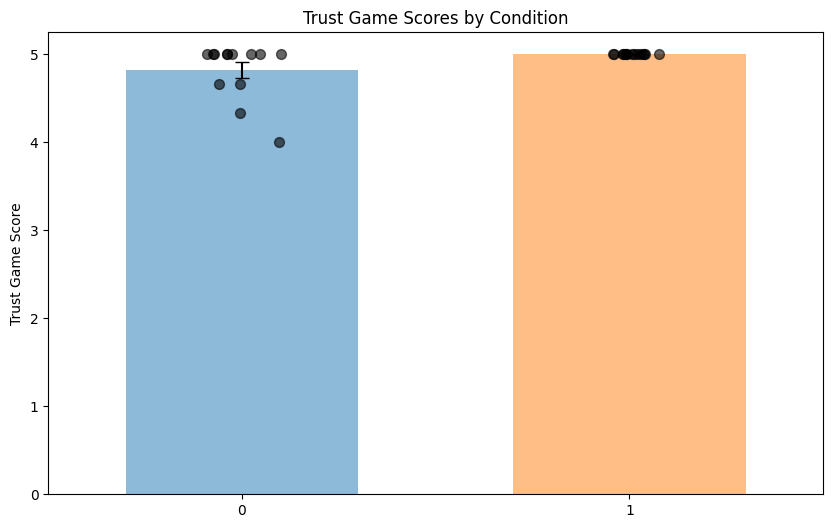

In [69]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot bars
for i, condition in enumerate(dc['condition'].unique()):
    plt.bar(i, 
            dc.loc[dc['condition'] == condition, 'trust_game_e_n'].mean(), 
            yerr=dc.loc[dc['condition'] == condition, 'trust_game_e_n'].std() / dc['condition'].value_counts()[condition]**0.5,
            capsize=5,
            alpha=0.5,
            width=0.6,
            label=condition)
    
    # Add jittered data points
    points = dc.loc[dc['condition'] == condition, 'trust_game_e_n']
    jitter = np.random.normal(0, 0.05, size=len(points))
    plt.scatter(jitter + i, 
                points,
                color='black',
                alpha=0.6,
                s=50)

plt.xticks(range(len(dc['condition'].unique())), dc['condition'].unique())
plt.ylabel('Trust Game Score')
plt.title('Trust Game Scores by Condition')

# Add some padding to x-axis
plt.xlim(-0.5, len(dc['condition'].unique()) - 0.5)

plt.show()

In [39]:
a = ols('trust_game_e_n ~ condition', data=dc).fit()
sm.stats.anova_lm(a, typ=2)

,sum_sq,df,F,PR(>F)
condition,0.224359,1.0,4.674658,0.039994
Residual,1.247863,26.0,NaN,NaN


In [70]:
# from d1, get subject id, for each subject id, get the difference between gators_1 and gators_2, and the condition
# then plot the difference between gators_1 and gators_2 by condition
d1['diff'] = d1['gators_2'] - d1['gators_1']
d1_long = d1.melt(id_vars=['condition', 'sub_id'],
                  value_vars=['diff'], 
                  var_name='measure', 
                  value_name='score')

In [71]:
d1_long.groupby(['condition', 'measure']).mean()

,,sub_id,score
condition,measure,,
0,diff,30.142857,0.457143
1,diff,30.066667,0.153333


In [72]:
# can you check if the difference between gators_1 and gators_2 is significant by condition?

model = ols('score ~ condition', data=d1_long).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

aov_table

,sum_sq,df,F,PR(>F)
condition,0.668381,1.0,1.232955,0.276625
Residual,14.636619,27.0,NaN,NaN


In [58]:
d4.columns

Index(['start_date', 'end_date', 'duration_in_seconds', 'sub_id',
       'impression_robot', 'impression_exp', 'feel_robot', 'feel_speed',
       'focus', 'decision', 'study', 'feedback', 'condition'],
      dtype='object')

In [65]:
for i in d4[d4['condition'] == 0]['impression_robot']:
    print(i)

i thought it was really cool
I liked it i thought it was fun
seemed fun idk. think it was able to do its job alright
I liked it it was a little strange at first because ive never interacted with a robot but it was predictable so i wasnt afraid of it
Pretty cool how it moves smoothly--never seen one in person
I like it because she thinks it is cute.
Neutral. She is pretty indifferent
I liked the robot, it seemed pretty cool.
Interesting--was unsure what it would look like, but cool to see it move
It was just kind of there and another object in the room. No feelings for it. First time seeing one so a little strange.
Liked it
Somewhat like. Interesting experience
liked it
I liked it I think it was fun to do the task with the robot. It was strange to focus on the robot and do the ball task, so that was hard to do, but I was impressed with the robot doing it


In [73]:
for i in d4[d4['condition'] == 1]['impression_robot']:
    print(i)

I liked it. Coming into this im unfamiliar with robotic arms, so didnt know what to expect, overall it was chill. wasnt scared coming into it, saw it as another arm doing the motions too
Liked it
kind of neutral about it but liked it more than not liked it. Nothing bad about it.
It was fine, no strong opinion
Neutral. Has some curiosity about it.
some more like it, thought it was interesting, not to say that she strongly likes it but somewhat like it. it will not discomfort me, found some unexpected joy or pleasure or relaxing feelings.
liked it. didn't nec dislike. neutral but more positive
Liked it
Liked it
Yeah it was fine, I didn't find anything wrong with it or working with it.
I didnt dislike it, it helped keep me on task and helped to show where i should be at if i was going too quick or too slowly. it kept me on pace.
Liked it, thought it was fun to do the task
I liked it it was fun it was a good robot very reliable
Overall neutral. Beginning it was a little weird seeing its mo